# Natural Language processing

In [1]:
# writing an sample text in an array

sample_text = ['call me tonight','book a cab','please call me','what is oam']

In [2]:
# importing count vectorizer from scikit learn library

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [3]:
# fitting the ciunt vectorizer

vect.fit(sample_text)

CountVectorizer()

In [4]:
# getting features names--> words given in sample text, each word is a feature 

features = vect.get_feature_names()
features

['book', 'cab', 'call', 'is', 'me', 'oam', 'please', 'tonight', 'what']

In [5]:
# sample code to undersatnd how to eliminate stop words

x =[1,4,6]

y = [2,3,4,5,1,6,7]
z= []

for item in y :
    if item not in x:
        z.append(item)
print(z)

[2, 3, 5, 7]


In [6]:
words_i_want =[]
stop_words =['are','is']

for item in features:
    if item not in stop_words:
        words_i_want.append(item)
print(words_i_want)

['book', 'cab', 'call', 'me', 'oam', 'please', 'tonight', 'what']


In [7]:
# transfroming the words into numbers using transform fucntion

sample_text_dtm = vect.transform(sample_text)
sample_text_dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [8]:
# arrangint the converted words into numbers in matrix or array

sample_text_dtm.toarray()

array([[0, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1]], dtype=int64)

In [9]:
# importing pandas for creating dataframs

import pandas as pd

In [10]:
pd.DataFrame(sample_text_dtm.toarray(),columns=vect.get_feature_names())

,book,cab,call,is,me,oam,please,tonight,what
0,0,0,1,0,1,0,0,1,0
1,1,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,1


In [11]:
# vectorization is a process of converting a collection of text data into numerical feature vector.

In [12]:
import numpy as np

In [13]:
# Importing the data

sms = pd.read_csv('Downloads/new.csv')
sms.head(10)

,Label,Message
0,spam,"Dear Student, Its never too late-clear your ba..."
1,spam,Join V-STUDY and score excellent marks in clas...
2,spam,"Join crash courses for B.ST,A/C'S,ECO,ENG,&IP ..."
3,spam,CRASH COURSES by BEST POOL OF FACULTY. ENGLISH...
4,ham,"Dear Ola Shuttle user, get 60% Off on your nex..."
5,spam,Please pay bill amount of Rs. 29 in cash for y...
6,spam,Watch the undercover story of Subhash Chandra ...
7,spam,"Bollywood Beauties go Bold. Get Videos, Wallpa..."
8,spam,Ab hum laye hai aapke liye romantic calletunes...
9,spam,Govt Mandate: Update Aadhaar to avoid blocking...


In [14]:
sms.shape

(184, 2)

In [15]:
sms.Label.value_counts()

spam    107
ham      77
Name: Label, dtype: int64

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

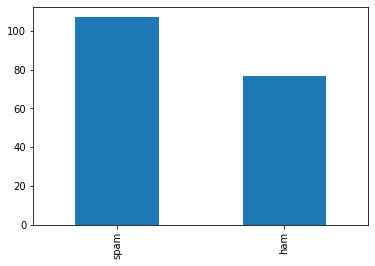

In [18]:
# bar graph for spam and ham count from the imported dataset

y = sms.Label.value_counts()
y.plot(kind='bar')

In [19]:
# defining new columum for target coloum for ham as 0 and spam as 1

sms['label_num']= sms.Label.map({'ham':0,'spam':1})

In [22]:
sms.head(10)

,Label,Message,label_num
0,spam,"Dear Student, Its never too late-clear your ba...",1
1,spam,Join V-STUDY and score excellent marks in clas...,1
2,spam,"Join crash courses for B.ST,A/C'S,ECO,ENG,&IP ...",1
3,spam,CRASH COURSES by BEST POOL OF FACULTY. ENGLISH...,1
4,ham,"Dear Ola Shuttle user, get 60% Off on your nex...",0
5,spam,Please pay bill amount of Rs. 29 in cash for y...,1
6,spam,Watch the undercover story of Subhash Chandra ...,1
7,spam,"Bollywood Beauties go Bold. Get Videos, Wallpa...",1
8,spam,Ab hum laye hai aapke liye romantic calletunes...,1
9,spam,Govt Mandate: Update Aadhaar to avoid blocking...,1


In [23]:
#defining variables and target

x = sms.Message
y = sms.label_num
print(x.shape,y.shape)

(184,) (184,)


In [24]:
# importing library for spillting data into train and test

from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=42,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(138,) (46,) (138,) (46,)


In [28]:
# initiating the vectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [29]:
print(vect.transform(x_train))

  (0, 134)	1
  (0, 180)	1
  (0, 184)	1
  (0, 196)	1
  (0, 224)	1
  (0, 235)	1
  (0, 252)	1
  (0, 317)	1
  (0, 369)	1
  (0, 458)	1
  (0, 514)	1
  (0, 515)	2
  (0, 516)	1
  (0, 561)	1
  (0, 565)	1
  (0, 577)	1
  (0, 585)	1
  (0, 622)	1
  (0, 630)	1
  (0, 633)	2
  (0, 649)	1
  (0, 658)	1
  (0, 672)	1
  (0, 701)	1
  (0, 715)	1
  :	:
  (136, 788)	1
  (136, 790)	1
  (136, 813)	1
  (136, 851)	1
  (136, 869)	1
  (136, 872)	1
  (137, 109)	1
  (137, 147)	1
  (137, 205)	1
  (137, 246)	1
  (137, 251)	1
  (137, 252)	1
  (137, 309)	1
  (137, 332)	1
  (137, 363)	2
  (137, 401)	1
  (137, 409)	1
  (137, 410)	2
  (137, 593)	1
  (137, 705)	1
  (137, 771)	1
  (137, 794)	1
  (137, 810)	1
  (137, 850)	1
  (137, 891)	1


In [31]:
x_train_dtm = vect.fit_transform(x_train)
print(x_train_dtm)

  (0, 458)	1
  (0, 515)	2
  (0, 565)	1
  (0, 865)	1
  (0, 196)	1
  (0, 184)	1
  (0, 633)	2
  (0, 715)	1
  (0, 900)	1
  (0, 672)	1
  (0, 904)	1
  (0, 252)	1
  (0, 134)	1
  (0, 514)	1
  (0, 235)	1
  (0, 1019)	1
  (0, 622)	1
  (0, 516)	1
  (0, 649)	1
  (0, 369)	1
  (0, 878)	1
  (0, 224)	1
  (0, 658)	1
  (0, 317)	1
  (0, 180)	1
  :	:
  (136, 396)	1
  (136, 83)	1
  (136, 872)	1
  (136, 377)	1
  (136, 240)	1
  (136, 103)	1
  (137, 252)	1
  (137, 409)	1
  (137, 246)	1
  (137, 850)	1
  (137, 147)	1
  (137, 410)	2
  (137, 810)	1
  (137, 251)	1
  (137, 705)	1
  (137, 771)	1
  (137, 332)	1
  (137, 205)	1
  (137, 891)	1
  (137, 309)	1
  (137, 401)	1
  (137, 794)	1
  (137, 363)	2
  (137, 593)	1
  (137, 109)	1


In [32]:
x_test_dtm =  vect.transform(x_test)
x_test_dtm

<46x1037 sparse matrix of type '<class 'numpy.int64'>'
	with 824 stored elements in Compressed Sparse Row format>

In [33]:
# importing and initiate a multinomial navie basis 

from sklearn.naive_bayes import MultinomialNB

In [51]:
model = MultinomialNB(alpha=1)

In [52]:
%time model.fit(x_train_dtm,y_train)

Wall time: 3.42 ms


MultinomialNB(alpha=1)

In [53]:
# predicting the spam or ham form test dataset

y_pred = model.predict(x_test_dtm)

In [54]:
# accuracy of the model

model.score(x_test_dtm,y_test)

0.8913043478260869

In [55]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [57]:
array(y_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [58]:
# Lets check how many is correclty predicted with out using inbuilt function

len(y_pred)

46

In [59]:
from __future__ import print_function
print("True: ", y_test.values[0])
print("True: ", y_pred[0])

True:  0
True:  0


In [61]:
count = 0
for i in range (len(y_pred)):
    if y_test.values[i] == y_pred[i]:
        count = count+1
print(count)
        

41


In [62]:
print("Accuracy : ", count/(len(y_pred)))

Accuracy :  0.8913043478260869
